In [1]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [30]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Cross-Validation Recommendations

1. K can be any number, but K=10 is generally recommended
2. For classification problems, stratified sampling is recommended for creating the folds
   
   - Each response class should be represented with equal proportions in each of the K folds
   - scikit-learn's cross_val_score function does this by default


In [5]:
from sklearn.model_selection import cross_val_score

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4)

In [9]:
knn_cross = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(knn_cross, X,y,cv=10,scoring="accuracy")
scores

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [24]:
scores.mean()

0.9666666666666668

In [26]:

k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scoring = cross_val_score(knn, X,y,cv=10,scoring="accuracy")
    k_scores.append(scoring.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline


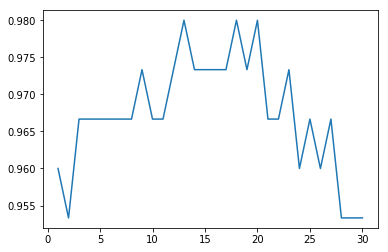

In [28]:
plt.plot(k_range, k_scores)
plt.xlabel = ('valuse of k in knn')
plt.ylabel = ("Cross_validation accuracy")

Now we can conclude tha knn with k = 20 gives the best scoring accuracy. even k = 13 and k = 17 give the same accuracy score but the higher then values of k, the simpler the model.
We can check it out

In [34]:
knn_20 = KNeighborsClassifier(n_neighbors=20)

In [36]:
cross_val_score(knn_20, X,y,cv=10,scoring="accuracy").mean()

0.9800000000000001

In [32]:
logreg = LogisticRegression()
log_scores = cross_val_score(logreg, X,y,cv=10,scoring="accuracy")
log_scores.mean()

C:\Users\adishree.b\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adishree.b\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\adishree.b\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adishree.b\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Futur

0.9533333333333334

We can see that the logistic regrression gives the avg accuracy of 95.3% on a 10 fold cross validation.

In [33]:
log_scores

array([1.        , 1.        , 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.8       , 0.93333333, 1.        , 1.        ])

We can conclude that the knn with k = 20 is the better choice for the model for this particular task.